<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>
<font size=4>
<br/>
</div>

# Personal Data

In [ ]:
# Set your student number
student_number = 98102165
Name = 'Mohammad Amin'
Last_Name = 'Keivanrad'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [ ]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict
import torchvision

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [ ]:
## FILL HERE
batch_size = 5
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 47771555.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print(train_dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Visualization

Visualize 1 random image from each class


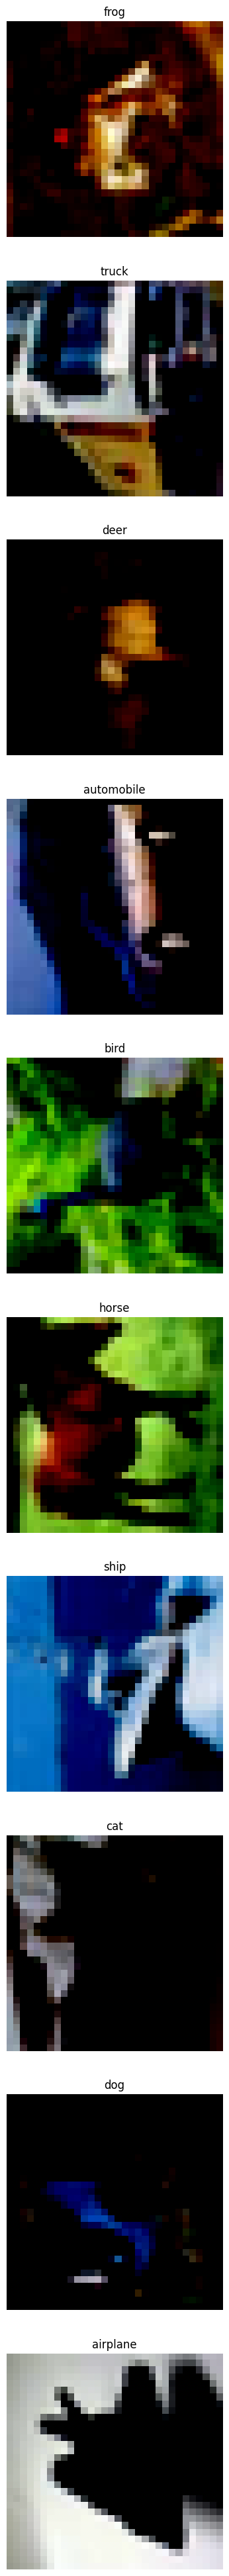

In [ ]:
## FILL HERE
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

classes = train_dataset.classes

random_images = {}

for data, target in train_dataset:
    if classes[target] not in random_images:
        random_images[classes[target]] = data

fig, axs = plt.subplots(nrows=len(random_images), figsize=(5, 5*len(random_images)))

for i, (class_name, image) in enumerate(random_images.items()):
    axs[i].imshow(image.permute(2, 1, 0).numpy())
    axs[i].set_title(class_name)
    axs[i].axis('off')


## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [ ]:
## FILL HERE
learning_rate = 0.005
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [ ]:
epoch_nums = 70
trainloader = train_loader
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## FILL HERE
        images, labels = data
        outputs = net(images)
        loss_op = loss(outputs, labels)
        optimizer.zero_grad()
        loss_op.backward()
        optimizer.step()
        ## You should train the model and also print the running loss for each batch
        print(f'for batch{i} loss is {loss_op}')
print('Finished Training')

Streaming output truncated to the last 5000 lines.
for batch5001 loss is 0.13266441226005554
for batch5002 loss is 5.388187219068641e-06
for batch5003 loss is 0.06601733714342117
for batch5004 loss is 0.0008048736490309238
for batch5005 loss is 0.0038754616398364305
for batch5006 loss is 0.2600037157535553
for batch5007 loss is 0.08833803981542587
for batch5008 loss is 0.05978935956954956
for batch5009 loss is 0.2178652286529541
for batch5010 loss is 0.07201292365789413
for batch5011 loss is 0.037319522351026535
for batch5012 loss is 0.05448231101036072
for batch5013 loss is 0.0025526750832796097
for batch5014 loss is 0.30966442823410034
for batch5015 loss is 0.049338165670633316
for batch5016 loss is 0.9305360913276672
for batch5017 loss is 1.7105776071548462
for batch5018 loss is 0.02911512553691864
for batch5019 loss is 0.0008293332648463547
for batch5020 loss is 0.04019875451922417
for batch5021 loss is 0.004202274139970541
for batch5022 loss is 0.023973770439624786
for batch5023 l

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
testloader = test_loader
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


Here, we also calculate the model performance for each class as well.

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')